# Solution

This notebook again contains a suggestion how you could have solved last week's homework. Working with spatial data and especially getting the World Bank Shapefile work with our data was a tough cookie! Congratulations to all of you who succeeded!

### First Task

In [8]:
import matplotlib.pyplot as plt # Import the library for creating plots
import numpy as np # Library for numerical operations
import pandas as pd # Library for data manipulation and analysis
import geopandas as gpd # Library for working with geospatial data

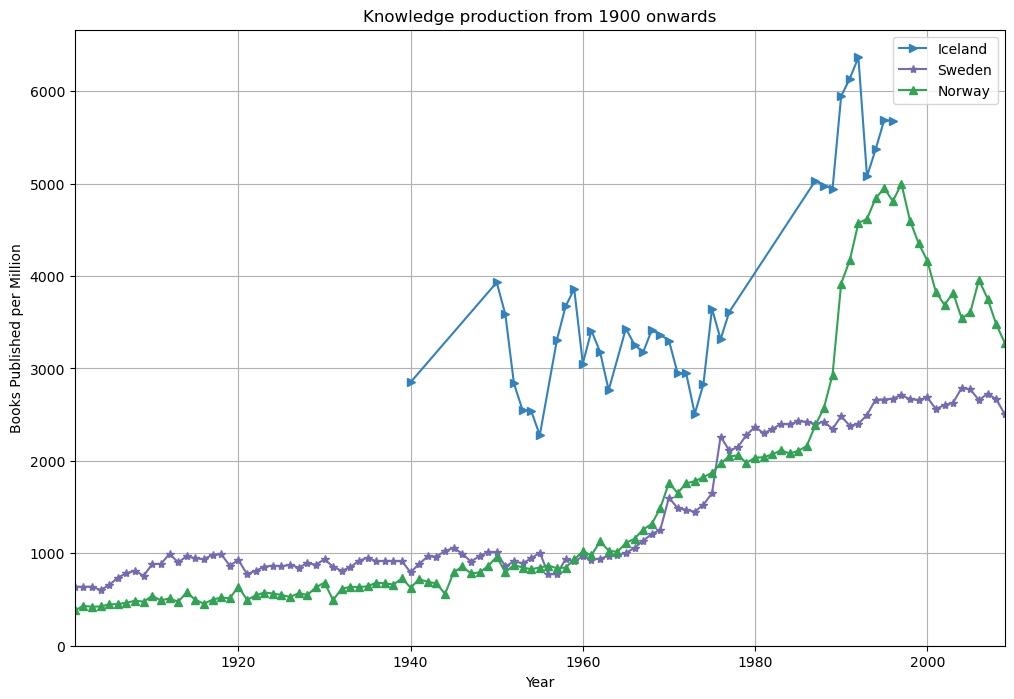

In [9]:
# Read the data from a CSV file
df = pd.read_csv("data/new-books-per-million.csv")

# Filter the data to include only the relevant years and countries
subset = df.query("year > 1900 and country in ['Iceland', 'Sweden', 'Norway']")

# Define colors and markers for each country
colors = [plt.get_cmap('tab20c')(0),  # Iceland
         plt.get_cmap('tab20c')(12),  # Sweden
         plt.get_cmap('tab20c')(8)]   # Norway

markers = [">", "*", "^"]  # Marker styles for each country

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the data for each country
for i, country in enumerate(['Iceland', 'Sweden', 'Norway']):
    ax.plot(subset.loc[subset.country == country, "year"], 
           subset.loc[subset.country == country, "books_pc"],
            label=f"{country}", marker=markers[i], linestyle='-',
            color=colors[i])

# Set labels and title for the plot
ax.set_xlabel('Year')
ax.set_ylabel('Books Published per Million')
ax.set_title('Knowledge production from 1900 onwards')

# Add a legend to the plot
ax.legend()

# Set the x and y limits for the plot
ax.set_xlim(subset.year.min(), subset.year.max())
ax.set_ylim(0)

# Show grid lines on the plot
plt.grid()

# Display the plot
plt.show()


### Second Task

In [10]:
# Read a shapefile containing geometrical information about countries
geometry = gpd.read_file("data/WB_countries_Admin0_10m.shp")

# Print the columns of the geometrical dataset
print(geometry.columns)

Index(['OBJECTID', 'featurecla', 'LEVEL', 'TYPE', 'FORMAL_EN', 'FORMAL_FR',
       'POP_EST', 'POP_RANK', 'GDP_MD_EST', 'POP_YEAR', 'LASTCENSUS',
       'GDP_YEAR', 'ECONOMY', 'INCOME_GRP', 'FIPS_10_', 'ISO_A2', 'ISO_A3',
       'ISO_A3_EH', 'ISO_N3', 'UN_A3', 'WB_A2', 'WB_A3', 'CONTINENT',
       'REGION_UN', 'SUBREGION', 'REGION_WB', 'NAME_AR', 'NAME_BN', 'NAME_DE',
       'NAME_EN', 'NAME_ES', 'NAME_FR', 'NAME_EL', 'NAME_HI', 'NAME_HU',
       'NAME_ID', 'NAME_IT', 'NAME_JA', 'NAME_KO', 'NAME_NL', 'NAME_PL',
       'NAME_PT', 'NAME_RU', 'NAME_SV', 'NAME_TR', 'NAME_VI', 'NAME_ZH',
       'WB_NAME', 'WB_RULES', 'WB_REGION', 'Shape_Leng', 'Shape_Area',
       'geometry'],
      dtype='object')


In [11]:
# Query and display unique country codes for specific countries of interest
# - We are interested in countries with the codes 'FRA', 'NOR', 'OWID_USS', and 'OWID_YGS'.
# - We're selecting the 'country' and 'code' columns and removing duplicates.
df.query("code in ['FRA', 'NOR', 'OWID_USS', 'OWID_YGS']")[["country", "code"]].drop_duplicates()

# Query and display information about a specific country using its ISO_A3_EH code
# - For example, we're looking for 'FRA' and displaying the English name and related codes.
geometry.query("ISO_A3_EH == 'FRA'")[["NAME_EN", "ISO_A3", "ISO_A3_EH"]]

# Query and display information about a specific country using its English name
# - For example, we're looking for 'Norway' and displaying related codes.
geometry.query("NAME_EN == 'Norway'")[["ISO_A3_EH", "ISO_A3", "NAME_EN"]]

# Adjust the ISO_A3_EH code for Norway in the geometrical dataset
# - We're setting it to 'NOR'.
geometry.loc[geometry.NAME_EN == "Norway", "ISO_A3_EH"] = "NOR"

# Creating a list of countries belonging to the USSR
ussr = [
    "Armenia", "Azerbaijan", "Belarus", "Estonia", "Georgia",
    "Kazakhstan", "Kyrgyzstan", "Latvia", "Lithuania", "Moldova",
    "Russia", "Tajikistan", "Turkmenistan", "Ukraine", "Uzbekistan"
]

# Iterate through the list of USSR countries and count how many times they appear in the geometrical dataset
for country in ussr:
    print(f"{country} and so many times {geometry.NAME_EN.str.match(country).sum()}")

Armenia and so many times 1
Azerbaijan and so many times 1
Belarus and so many times 1
Estonia and so many times 1
Georgia and so many times 1
Kazakhstan and so many times 1
Kyrgyzstan and so many times 1
Latvia and so many times 1
Lithuania and so many times 1
Moldova and so many times 1
Russia and so many times 1
Tajikistan and so many times 1
Turkmenistan and so many times 1
Ukraine and so many times 1
Uzbekistan and so many times 1


In [12]:
# Update the ISO_A3_EH code for the USSR countries to 'OWID_USS' in the geometrical dataset
for country in ussr:
    geometry.loc[geometry.NAME_EN.str.match(country), "ISO_A3_EH"] = "OWID_USS"
    
yugoslavia = [
    "Bosnia and Herzegovina",
    "Croatia",
    "Republic of Macedonia",
    "Montenegro",
    "Serbia",
    "Slovenia"
]

# Iterate through the list of Yugoslav countries and count how many times each appears in the geometrical dataset
for country in yugoslavia:
    print(f"{country} and so many times {geometry.NAME_EN.str.match(country).sum()}")

Bosnia and Herzegovina and so many times 1
Croatia and so many times 1
Republic of Macedonia and so many times 1
Montenegro and so many times 1
Serbia and so many times 1
Slovenia and so many times 1


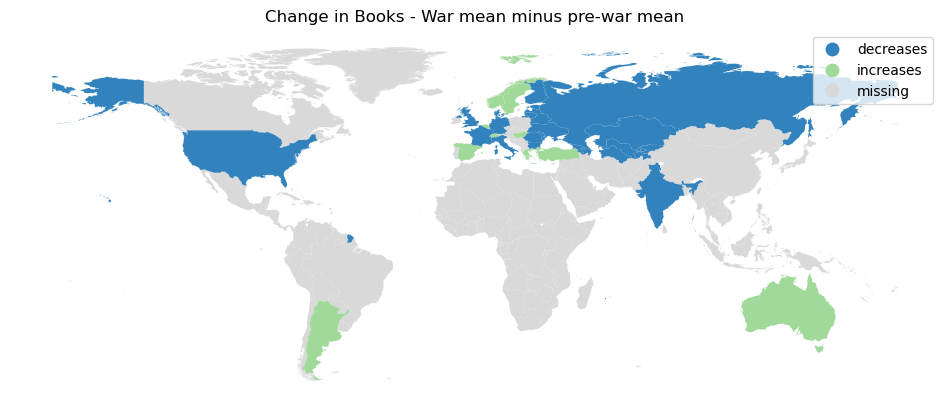

In [13]:
# Update the ISO_A3_EH code for Yugoslav countries to 'OWID_YGS' in the geometrical dataset
for country in yugoslavia:
    geometry.loc[geometry.NAME_EN.str.match(country), "ISO_A3_EH"] = "OWID_YGS"

# Now, we are ready to generate means and combine the information

# Calculate the mean of book publications per million people for the pre-war period (1919-1938)
books_prewar = df[(df.year >= 1919) & (df.year <= 1938)].groupby("country").mean()[["books_pc"]].round(0).astype(int)
books_prewar.reset_index(inplace=True)

# Calculate the mean of book publications per million people for the war period (1939-1944)
books_war = df[(df.year >= 1939) & (df.year <= 1944)].groupby("country").mean()[["books_pc"]].round(0).astype(int)
books_war.reset_index(inplace=True)

# Merge the 'df' DataFrame with 'books_prewar' based on the 'country' column
# - We are selecting only the 'country' and 'code' columns, removing duplicates.
# - Merging the 'books_prewar' dataset on 'country' with a left join.
df = df[["country", "code"]].drop_duplicates().merge(books_prewar, how="left", on="country")

# Merge the resulting DataFrame with 'books_war' based on the 'country' column
# - Using suffixes to differentiate columns from 'books_prewar' and 'books_war'.
df = df.merge(books_war, how="left", on="country", suffixes=["_prewar", "_war"])

# Keep only rows where both 'books_pc_prewar' and 'books_pc_war' are not missing
df = df[(~df.books_pc_prewar.isna()) & (~df.books_pc_war.isna())].copy()

# Calculate the change in books published per million people
df["change"] = df.books_pc_war - df.books_pc_prewar

# Select specific columns from the 'geometry' dataset, including English country names and geometry
geometry = geometry[["NAME_EN", "geometry", "ISO_A3_EH"]]

# Remove duplicate ISO_A3_EH values to select only unique observations
# - Sorting the data by 'NAME_EN'
geometry.loc[geometry[["ISO_A3_EH"]].duplicated(), ["NAME_EN", "ISO_A3_EH"]].sort_values("NAME_EN")

# Keep only unique observations based on the 'NAME_EN' column
geometry = geometry.loc[~geometry[["NAME_EN"]].duplicated()]

# Merge 'df' with 'geometry' based on the 'code' and 'ISO_A3_EH' columns
df = df.merge(geometry[["ISO_A3_EH", "geometry", "NAME_EN"]], how="right", left_on="code", right_on="ISO_A3_EH")

# Create a GeoDataFrame using the resulting DataFrame, specifying the 'geometry' column
df = gpd.GeoDataFrame(df, geometry='geometry')

# Categorize the 'change' column based on whether it's negative, zero, missing, or positive
df.loc[:, "change"] = np.where(df.change < 0, "decreases",
                               np.where(df.change == 0, "no change",
                                        np.where(df.change.isna(), "missing", "increases")))

# Change the data type of the 'change' column to 'category'
df.change = df.change.astype("category")

# Sort the DataFrame based on the 'change' column in descending order
df = df.sort_values(by="change", ascending=False)

# Create a figure and axis with a specified size
fig, ax = plt.subplots(figsize=(12, 8))

# Use the DataFrame "df" to create a choropleth map (a map with colors) based on the "change" column
# Choose a color map ("cmap") for the map, and display a color legend
df.plot(column="change", ax=ax, cmap="tab20c", legend=True)

# Set the title for the map
ax.set_title("Change in Books - War mean minus pre-war mean")

# Turn off the frame (border) of the map
ax.set_frame_on(False)

# Hide the x-axis and y-axis labels on the map
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

# Save the map as an image file named 'book_war.jpg' with a high DPI (dots per inch)
# and ensure that the content is tightly cropped to the plot area
plt.savefig('book_war.jpg', dpi=500, bbox_inches="tight")